# Data Description

This dataset, sourced from Kaggle, contains country wide data on English Premier league teams from the 2006/07 season up to the 2017/18 season.

It consists of 2 csv files, 'results' and 'stats'. I will be focusing on the 'stats' dataset which has 240 rows and 42 columns. The key columns are 'team', 'wins', 'losses' and 'goals'.

It consists of 39 different teams who have played at least one season in the Premier League between 2006/07 and 2017/18 and can be updated with newer seasons by scraping data from the Premier League website (the source of information already in this dataset).

Missing values are minimal with some seasons not having infomation for very niche statistics, for example 'backward_pass' and 'big_chances_missed'.

The dataset is useful for time-series analysis across seasons, trend identification and comparisons between individual teams or statistics.

# 1. Project setup
# 2. Data Loading and Inspection
## Step 1: Import the libraries



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league/stats.csv
/kaggle/input/premier-league/results.csv


## Step 2: Load your dataset using Pandas

In [2]:
df=pd.read_csv('/kaggle/input/premier-league/stats.csv')

## Step 3: Inspect the dataset


In [3]:
df.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

In [5]:
df.isnull().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [6]:
#Finding out the number of teams in the dataset for the description
df['team'].nunique()

39

# 3. Data Cleaning
## Step 4: Handle missing data


In [7]:
# checking what seasons have null data associated with them for filtering
grouped=df.groupby('season').agg({
    'saves': 'mean',
    'head_clearance': 'mean',
    'total_through_ball': 'mean',
    'backward_pass': 'mean',
    'big_chance_missed': 'mean',
    'dispossessed': 'mean',
})
grouped

,saves,head_clearance,total_through_ball,backward_pass,big_chance_missed,dispossessed
season,,,,,,
2006-2007,8.00,NaN,NaN,NaN,NaN,NaN
2007-2008,1.90,991.85,44.05,NaN,NaN,597.20
2008-2009,NaN,861.15,150.90,NaN,NaN,531.40
2009-2010,1.00,774.75,135.45,NaN,NaN,514.60
2010-2011,0.25,693.00,129.85,2134.70,47.40,489.10
2011-2012,1.45,574.80,100.75,2481.90,42.10,463.25
2012-2013,1.35,635.40,81.75,2474.45,44.20,453.65
2013-2014,117.25,660.20,63.55,2567.40,39.15,444.60
2014-2015,109.80,668.20,56.45,2515.60,34.70,436.10


In [8]:
# I decided to drop the columns with null values because I decided that the data for other categories during the
# earlier seasons would be more important than these categories with null values (eg. Goals/Wins/Losses from 06/07-09/10 are more important
# than the number of backward passes or total through balls)
df_clean=df.dropna(axis='columns')
df_clean

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,18723.0,2397.0,918.0,258.0,25686.0,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,16759.0,2270.0,897.0,231.0,24010.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,17154.0,2800.0,1107.0,282.0,24150.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,18458.0,2045.0,873.0,278.0,25592.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,14914.0,2408.0,796.0,181.0,22200.0,2.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,14960.0,2563.0,765.0,165.0,22619.0,6.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,15721.0,2580.0,694.0,150.0,22775.0,1.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,17174.0,2541.0,800.0,227.0,24639.0,4.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,12892.0,2528.0,598.0,136.0,20368.0,3.0,0.0,27.0,14.0,2017-2018


# 4. Exploratory Data Analysis (EDA)
## Step 5: Summary statistics of numerical columns

In [9]:
df_clean.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,14.150000,14.150000,51.062500,61.079167,2.862500,514.241667,168.116667,12.283333,9.016667,3.650000,...,3.650000,15691.908333,2286.150000,831.370833,207.191667,23908.962500,4.991667,0.837500,54.920833,22.783333
std,6.022482,5.596846,16.203474,10.078249,1.802442,95.979164,38.748882,4.820950,3.659077,2.052246,...,1.930378,3176.276737,295.618128,118.551756,35.933177,3247.161627,2.804646,0.947718,18.780999,9.148869
min,1.000000,2.000000,20.000000,38.000000,0.000000,338.000000,94.000000,4.000000,1.000000,0.000000,...,0.000000,9478.000000,1462.000000,572.000000,136.000000,16772.000000,0.000000,0.000000,19.000000,4.000000
25%,10.000000,10.000000,40.000000,54.000000,1.000000,441.000000,140.000000,9.000000,6.000000,2.000000,...,2.000000,13379.750000,2070.000000,749.000000,180.000000,21577.000000,3.000000,0.000000,40.000000,17.000000
50%,12.000000,15.000000,47.000000,60.500000,3.000000,498.500000,158.500000,11.500000,9.000000,3.500000,...,3.000000,14937.000000,2276.500000,818.000000,201.000000,23168.500000,5.000000,1.000000,53.000000,22.000000
75%,18.000000,19.000000,61.000000,67.000000,4.000000,572.000000,194.250000,15.000000,12.000000,5.000000,...,5.000000,18250.250000,2470.500000,911.250000,230.000000,26294.000000,7.000000,1.000000,68.000000,27.000000
max,32.000000,29.000000,106.000000,94.000000,9.000000,834.000000,288.000000,33.000000,18.000000,11.000000,...,11.000000,28241.000000,3176.000000,1156.000000,309.000000,35130.000000,16.000000,5.000000,118.000000,66.000000


# 5. Data Visualization Using Matplotlib
## Step 6: Plot a line graph


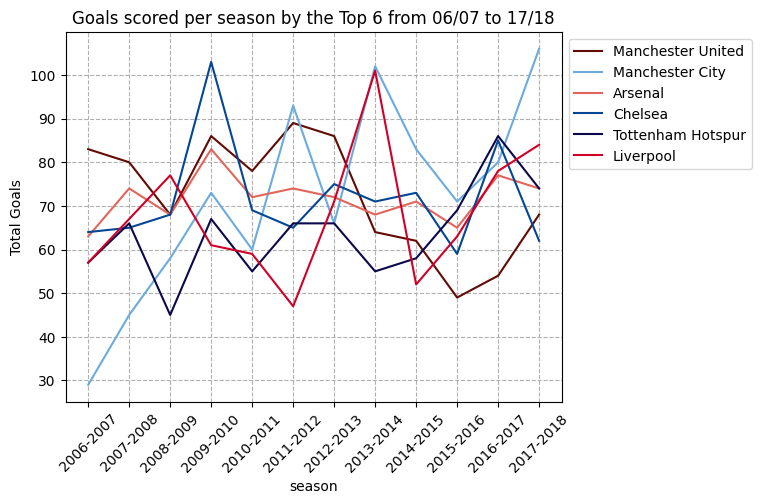

In [61]:
df_filtered1 = df_clean.loc[df_clean['team']=='Manchester United']
df_filtered2 = df_clean.loc[df_clean['team']=='Manchester City']
df_filtered3 = df_clean.loc[df_clean['team']=='Arsenal']
df_filtered4 = df_clean.loc[df_clean['team']=='Chelsea']
df_filtered5 = df_clean.loc[df_clean['team']=='Tottenham Hotspur']
df_filtered6 = df_clean.loc[df_clean['team']=='Liverpool']
plt.plot(df_filtered1['season'], df_filtered1['goals'], color='#620A04', label='Manchester United')
plt.plot(df_filtered2['season'], df_filtered2['goals'], color='#6CABDD', label='Manchester City')
plt.plot(df_filtered3['season'], df_filtered3['goals'], color='#E2655A', label='Arsenal')
plt.plot(df_filtered4['season'], df_filtered4['goals'], color='#034694', label='Chelsea')
plt.plot(df_filtered5['season'], df_filtered5['goals'], color='#0C084C', label='Tottenham Hotspur')
plt.plot(df_filtered6['season'], df_filtered6['goals'], color='#D00027', label='Liverpool')

plt.xlabel('season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.title('Goals scored per season by the Top 6 from 06/07 to 17/18')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.grid(linestyle='--')

plt.show()

## Step 7: Create a bar chart

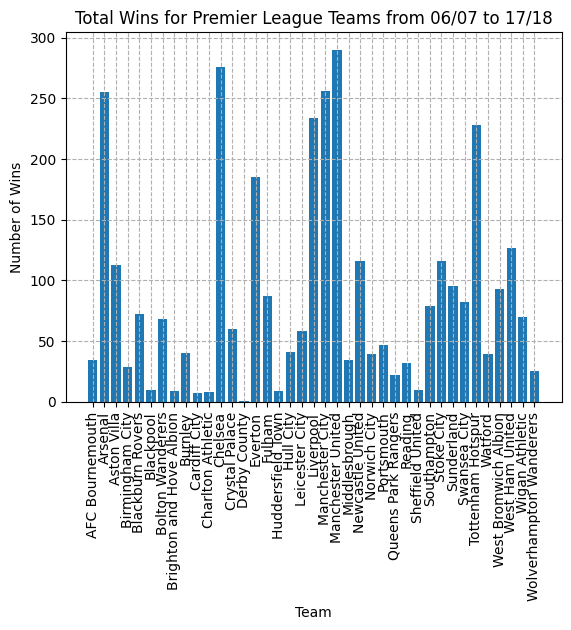

In [70]:
total_over_years = df_clean.groupby('team').sum().reset_index()
plt.bar(total_over_years['team'],total_over_years['wins'])
plt.title('Total Wins for Premier League Teams from 06/07 to 17/18')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.show()

# 6. Advanced EDA
## Step 10: Create a more advanced EDA visual


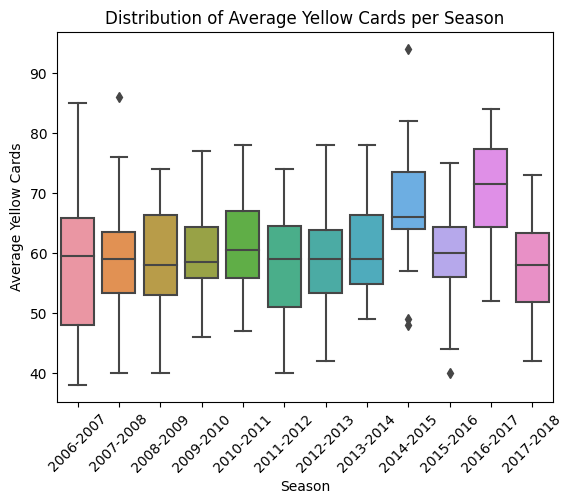

In [76]:
total_over_years = df_clean.groupby(['season','team'])[['total_yel_card']].mean().reset_index()
sns.boxplot(data=total_over_years, x='season', y='total_yel_card')
plt.xlabel('Season')
plt.ylabel('Average Yellow Cards')
plt.title('Distribution of Average Yellow Cards per Season')
plt.xticks(rotation=45)
plt.show()

# 7. Summary Insights 

From my first visual, I can see how many goals each of the Top 6 teams scored in each season from 06/07 to 17/18.

I can deduce that Manchester City had the best progression over those seasons going from less than 30 goals in 06/07 to over 100 in 13/14 and 17/18, this is in line with their meteoric rise over the last decade and a half. 

Arsenal was the most consistent team over the 12 seasons having never scored less than 60 or more than 85 goals over this period. 

The worst-performing team is Tottenham having scored less than 70 goals in ten out of the 12 seasons before slightly improving in the last two seasons.

The quickest improvement was Liverpool from 11/12 to 13/14. They went from under 50 goals a season to just over 70 and then to over 100.

Overall this data is very sporadic as from season to season teams perform better or worse due to many different reasons such as different managers, different opposition (due to promotions and relegations), different calendars (Not all 6 teams would play in European competitions each season or reach farther in domestic cup competitions) and constantly changing teams over the years through transfers.

*

From my second Visual, I can see the total number of wins by each team in the premier league throughout the seasons from 06/07 to 17/18. 

The teams with the highest number are the Top 6 followed closely by Everton. The reason behind the huge difference to all other teams is partly due to teams with more wins being better but also because of the number of seasons teams were in the Premier League during the period.

For example, Derby County who only had one year in the Premier League had less than 5 wins that year so they hardly appear on the graph. 

If I were to improve this visual I would add a colour code to show the count of seasons each team was in the Premier League so we can compare teams more fairly but this could also be done using average wins instead of total wins to eliminate the advantage of playing more seasons in the Premier League.

*

From my third and final visual, I can see the distribution of yellow cards obtained by teams in each season from 06/07 to 17/18.

The general trend of yellow cards stays relatively the same from 06/07 until 13/14 before yo-yo-ing up in 14/15, down in 15/16, up in 16/17 and down again in 17/18.

The reason behind this yo-yo-ing could be several reasons such as a particularly rough team joining the league that season or new rules being implemented into the game.

In my opinion, the first reason is more likely the case for the 14/15 season as we see that this is the year where one team recorded more yellow cards than any other team in any season.

I also believe that the second reason is true as rule changes take a few years to get used to as referees and players need time to learn how to manage the game differently and adapt their behaviour to new rules respectively. We can see the trend return to relative normality in the 17/18 season.
